In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Looking at the data

Training set

In [2]:
train_data = pd.read_csv("../data/raw/train_u6lujuX_CVtuZ9i.csv")

train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Testing set

In [3]:
test_data = pd.read_csv("../data/raw/test_Y3wMUE5_7gLdaTN.csv")

test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Looking at both set's size

In [4]:
print("Training set size: ", train_data.shape)
print("Testing set size: ", test_data.shape)

Training set size:  (614, 13)
Testing set size:  (367, 12)


### Explore the training set more so we can preprocess it

In [13]:
train_data.info()
print("\nNumber of null value in data: \n", train_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB

Number of null value in data: 
 Loan_ID               0
Gender               13
Married               3
Depende

In [10]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### What we can draw from the summary and information

1. ApplicantIncome, and CoapplicantIcome has high standard deviation which indicate high variability in the datasets. This call for data normalization to ensure less spread.

2. Applicants income ranges from as low as 150 to as high as 81000, which could indiciate potential outliers, since 75% of applicants has an income of lower than 5795.

3. Around 25% of co-applicant has no income, which indicate that these loan were applied without co-applicant.

4. The average loan requested is 146.41 but the maximum amount of loan requested is 700 comapred to the 75th percentile (168) which could indicate outliers.

5. Most loan are 360, but there are some as low as 12 which could indicate short-term loans

6. The average credit history is 0.84 which indicate most applicant has good credit history. However, most applicant are missing their credit history.

So columns with null value includes: Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History. According to the paper, the missing value are removed.

Loan_ID column is not needed, so we will drop it from both the training set and testing set

In [4]:
train_data.drop("Loan_ID", axis=1, inplace=True)
test_data.drop("Loan_ID", axis=1, inplace=True)

train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Removing missing value

Test set also contain missing value, which we will drop

In [9]:
test_data.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [5]:
train_data = train_data.dropna()
test_data = test_data.dropna()

print("Train set after removing missing value: ", train_data.shape)
print("Test set after removing missing value: ", test_data.shape)

Train set after removing missing value:  (480, 12)
Test set after removing missing value:  (289, 11)


### Removing duplicate value

In [84]:
train_duplicates = train_data.duplicated()
test_duplicates = test_data.duplicated()

print("Duplicated row in train set: ", train_duplicates.sum())
print("Duplicated row in test set: ", test_duplicates.sum())

Duplicated row in train set:  0
Duplicated row in test set:  1


Check duplicated value in the test set incase similar applicants

In [58]:
# Return all rows that are duplicates (including the first occurrence)
duplicate_rows_inclusive = test_data[test_data.duplicated(keep=False)]
print(duplicate_rows_inclusive)


    Gender Married Dependents Education Self_Employed  ApplicantIncome  \
38    Male      No          0  Graduate           Yes             5833   
195   Male      No          0  Graduate           Yes             5833   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
38                   0       116.0             360.0             1.0   
195                  0       116.0             360.0             1.0   

    Property_Area  
38          Urban  
195         Urban  


In [6]:
# Drop duplicate rows
test_data = test_data.drop_duplicates()

### Checking for outliers

<Axes: xlabel='ApplicantIncome', ylabel='Loan_Status'>

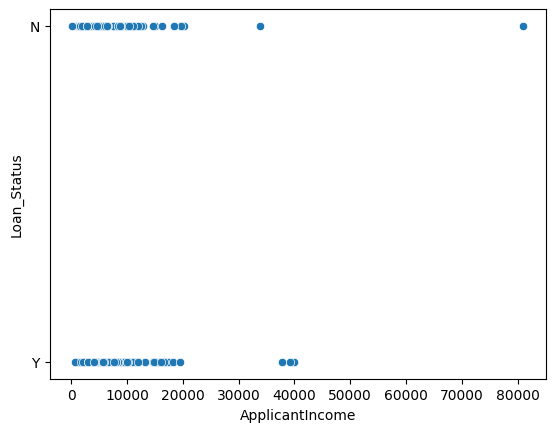

In [14]:
sns.scatterplot(x=train_data['ApplicantIncome'], y=train_data['Loan_Status'])

<Axes: xlabel='CoapplicantIncome', ylabel='Loan_Status'>

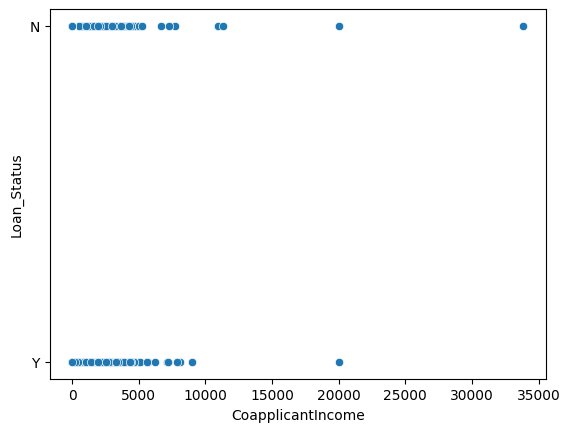

In [15]:
sns.scatterplot(x=train_data['CoapplicantIncome'], y=train_data['Loan_Status'])

<Axes: xlabel='LoanAmount', ylabel='Loan_Status'>

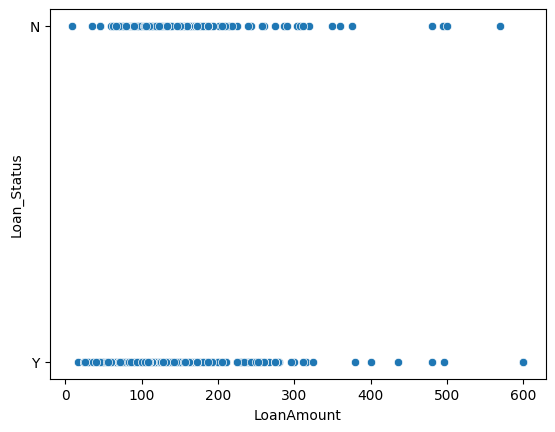

In [16]:
sns.scatterplot(x=train_data['LoanAmount'], y=train_data['Loan_Status'])

ApplicantIncome, and CoapplicantIncome seems to have a few outliers, which we will need to apply log transformation to reduce the skewness of the data after splitting the data for training and testing

### Data Encoding

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


In [19]:
train_data.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      405
CoapplicantIncome    232
LoanAmount           186
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [20]:
print(train_data["Gender"].unique())
print(train_data["Married"].unique())
print(train_data["Dependents"].unique())
print(train_data["Education"].unique())
print(train_data["Self_Employed"].unique())
print(train_data["Property_Area"].unique())
print(train_data["Loan_Status"].unique())
print(train_data["Loan_Amount_Term"].unique())


['Male' 'Female']
['Yes' 'No']
['1' '0' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Rural' 'Urban' 'Semiurban']
['N' 'Y']
[360. 120. 180.  60. 300. 480. 240.  36.  84.]


Data encoding involves turning any object data into numerical value through mapping

Based on the research paper, Integer-encoding approach is used to encode all categorical value. For 𝑒𝑖 ,
it is a vector of the standard base, where 𝑒𝑖 denotes the vector with
the 𝑖𝑡ℎ coordinate.

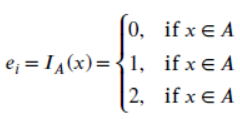

In [7]:
to_numeric = {'Male': 1, 'Female': 0,
'Yes': 1, 'No': 0,
'Graduate': 1, 'Not Graduate': 0,
'Urban': 2, 'Semiurban': 1,'Rural': 0,
'Y': 1, 'N': 0,
'3+': 3}

# adding the new numeric values from the to_numeric variable to both datasets
train_data = train_data.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
test_data = test_data.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

# convertind the Dependents column
Dependents_ = pd.to_numeric(train_data.Dependents)
Dependents__ = pd.to_numeric(test_data.Dependents)

# dropping the previous Dependents column
train_data.drop(['Dependents'], axis = 1, inplace = True)
test_data.drop(['Dependents'], axis = 1, inplace = True)

# concatination of the new Dependents column with both datasets
train_data = pd.concat([train_data, Dependents_], axis = 1)
test_data = pd.concat([test_data, Dependents__], axis = 1)

# checking the our manipulated dataset for validation
print(f"training set (row, col): {train_data.shape}\n\ntesting set (row, col): {test_data.shape}\n")
print(train_data.info(), "\n\n", test_data.info())

training set (row, col): (480, 12)

testing set (row, col): (288, 11)

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Education          480 non-null    int64  
 3   Self_Employed      480 non-null    int64  
 4   ApplicantIncome    480 non-null    int64  
 5   CoapplicantIncome  480 non-null    float64
 6   LoanAmount         480 non-null    float64
 7   Loan_Amount_Term   480 non-null    float64
 8   Credit_History     480 non-null    float64
 9   Property_Area      480 non-null    int64  
 10  Loan_Status        480 non-null    int64  
 11  Dependents         480 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 48.8 KB
<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 0 to 366
Data columns (total 11 columns):
 #   C

C:\Users\Angkor Computer\AppData\Local\Temp\ipykernel_10540\2314564344.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_data = train_data.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
C:\Users\Angkor Computer\AppData\Local\Temp\ipykernel_10540\2314564344.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_data = test_data.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)


In [13]:
print(train_data["Gender"].unique())
print(train_data["Married"].unique())
print(train_data["Dependents"].unique())
print(train_data["Education"].unique())
print(train_data["Self_Employed"].unique())
print(train_data["Property_Area"].unique())
print(train_data["Loan_Status"].unique())

[1 0]
[1 0]
[1 0 2 3]
[1 0]
[0 1]
[0 2 1]
[0 1]


In [23]:
train_data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,1
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,2,1,0
3,1,1,0,0,2583,2358.0,120.0,360.0,1.0,2,1,0
4,1,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,0
5,1,1,1,1,5417,4196.0,267.0,360.0,1.0,2,1,2


In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Education          480 non-null    int64  
 3   Self_Employed      480 non-null    int64  
 4   ApplicantIncome    480 non-null    int64  
 5   CoapplicantIncome  480 non-null    float64
 6   LoanAmount         480 non-null    float64
 7   Loan_Amount_Term   480 non-null    float64
 8   Credit_History     480 non-null    float64
 9   Property_Area      480 non-null    int64  
 10  Loan_Status        480 non-null    int64  
 11  Dependents         480 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 48.8 KB


According to the research paper, a column called TotalIncome was made by adding ApplicantIncome with CoapplicantIncome

In [14]:
train_data["TotalIncome"] = train_data["ApplicantIncome"] + train_data["CoapplicantIncome"]

In [15]:
train_data.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents,TotalIncome
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667,0.777083,6945.324833
std,0.383892,0.478118,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287,1.020815,5969.948374
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000,0.000000,1442.000000
25%,1.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000,0.000000,4148.000000
50%,1.000000,1.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000,0.000000,5422.500000
75%,1.000000,1.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000,2.000000,7672.500000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000,3.000000,81000.000000


Now that the data are cleaned, we will save it onto a new CSV file and have it ready for preprocessing.

In [16]:
# Save the DataFrame to a CSV file
train_data.to_csv('../data/clean/data.csv', index=False)